In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings("ignore")

In [3]:
orange = pd.read_csv("D:\Analisis data eksploratif\Orange Quality Data.csv")

In [4]:
orange.head()

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,Orange,Valencia,N,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,Deep Orange,Navel,N,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,N,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,Orange-Red,Blood Orange,N,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,Orange,Hamlin,Y (Minor),4.5


In [5]:
print(orange.shape)

(241, 11)


In [6]:
orange.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Size (cm)           241 non-null    float64
 1   Weight (g)          241 non-null    int64  
 2   Brix (Sweetness)    241 non-null    float64
 3   pH (Acidity)        241 non-null    float64
 4   Softness (1-5)      241 non-null    float64
 5   HarvestTime (days)  241 non-null    int64  
 6   Ripeness (1-5)      241 non-null    float64
 7   Color               241 non-null    object 
 8   Variety             241 non-null    object 
 9   Blemishes (Y/N)     241 non-null    object 
 10  Quality (1-5)       241 non-null    float64
dtypes: float64(6), int64(2), object(3)
memory usage: 20.8+ KB


In [7]:
orange.isnull().sum()

Size (cm)             0
Weight (g)            0
Brix (Sweetness)      0
pH (Acidity)          0
Softness (1-5)        0
HarvestTime (days)    0
Ripeness (1-5)        0
Color                 0
Variety               0
Blemishes (Y/N)       0
Quality (1-5)         0
dtype: int64

In [8]:
orange.duplicated().sum()

0

In [9]:
orange.describe()

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Quality (1-5)
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,7.844813,205.128631,10.907884,3.473900,3.072614,15.344398,3.599585,3.817427
std,1.086002,56.461012,2.760446,0.421007,1.323630,5.323852,1.205214,1.014410
min,6.000000,100.000000,5.500000,2.800000,1.000000,4.000000,1.000000,1.000000
25%,6.900000,155.000000,8.500000,3.200000,2.000000,11.000000,3.000000,3.000000
50%,7.800000,205.000000,11.000000,3.400000,3.000000,15.000000,4.000000,4.000000
75%,8.700000,252.000000,13.400000,3.800000,4.000000,20.000000,4.500000,4.500000
max,10.000000,300.000000,16.000000,4.400000,5.000000,25.000000,5.000000,5.000000


### Analisis Data Eksploratif

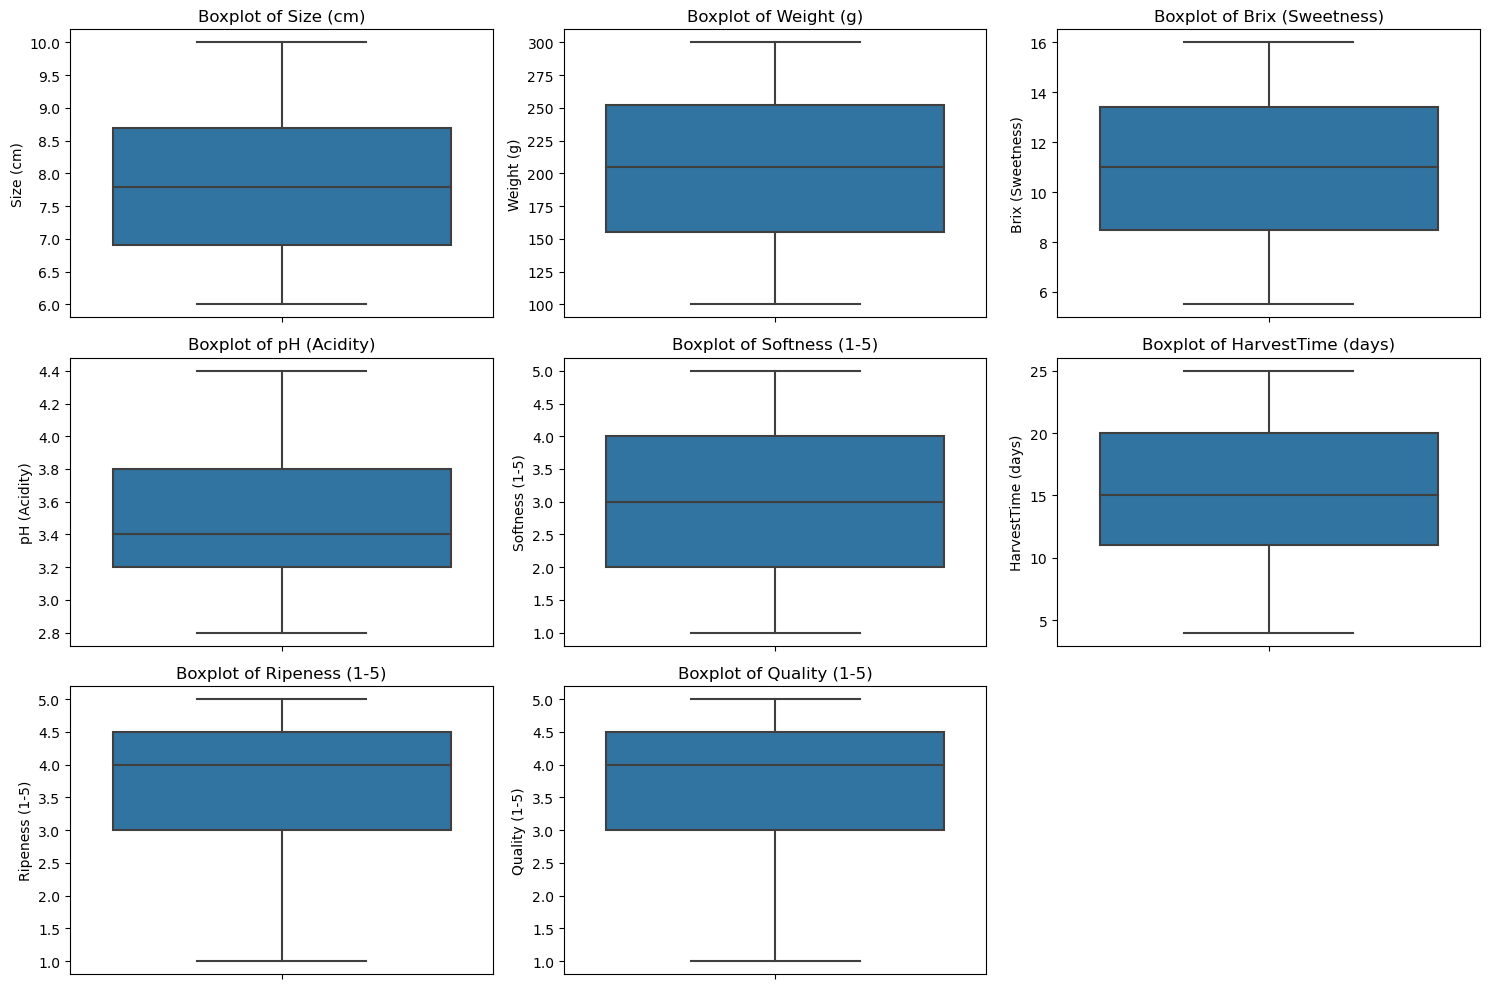

In [10]:
# Memeriksa outlier dengan menggunakan boxplot
# Variabel Numerik
columns_to_check = ['Size (cm)', 'Weight (g)', 'Brix (Sweetness)', 
                    'pH (Acidity)', 'Softness (1-5)', 
                    'HarvestTime (days)', 'Ripeness (1-5)', 
                    'Quality (1-5)']

plt.figure(figsize=(15, 10))

for i, col in enumerate(columns_to_check, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=orange[col])  
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [11]:
orange.describe()

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Quality (1-5)
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,7.844813,205.128631,10.907884,3.473900,3.072614,15.344398,3.599585,3.817427
std,1.086002,56.461012,2.760446,0.421007,1.323630,5.323852,1.205214,1.014410
min,6.000000,100.000000,5.500000,2.800000,1.000000,4.000000,1.000000,1.000000
25%,6.900000,155.000000,8.500000,3.200000,2.000000,11.000000,3.000000,3.000000
50%,7.800000,205.000000,11.000000,3.400000,3.000000,15.000000,4.000000,4.000000
75%,8.700000,252.000000,13.400000,3.800000,4.000000,20.000000,4.500000,4.500000
max,10.000000,300.000000,16.000000,4.400000,5.000000,25.000000,5.000000,5.000000


In [12]:
print(orange['Quality (1-5)'].unique()) 

[4.  4.5 5.  3.5 1.  3.  2.5 2. ]


In [13]:
print(orange.dtypes)

Size (cm)             float64
Weight (g)              int64
Brix (Sweetness)      float64
pH (Acidity)          float64
Softness (1-5)        float64
HarvestTime (days)      int64
Ripeness (1-5)        float64
Color                  object
Variety                object
Blemishes (Y/N)        object
Quality (1-5)         float64
dtype: object


In [14]:
print(orange.columns)

Index(['Size (cm)', 'Weight (g)', 'Brix (Sweetness)', 'pH (Acidity)',
       'Softness (1-5)', 'HarvestTime (days)', 'Ripeness (1-5)', 'Color',
       'Variety', 'Blemishes (Y/N)', 'Quality (1-5)'],
      dtype='object')


In [15]:
kategori_kolom = ['Color', 'Variety', 'Blemishes (Y/N)']

In [16]:
kolom_numerik = ['Size (cm)', 'Weight (g)', 'Brix (Sweetness)', 
                 'pH (Acidity)', 'Softness (1-5)', 'HarvestTime (days)', 
                 'Ripeness (1-5)', 'Quality (1-5)']

In [17]:
# Menghitung mean, median, dan modus
mean_values = orange[kolom_numerik].mean()
median_values = orange[kolom_numerik].median()
modus_values = orange[kolom_numerik].mode().iloc[0]  # .iloc[0] untuk mengambil modus pertama jika ada lebih dari satu

# Menampilkan hasil
print("\nMean:")
print(mean_values)

print("\nMedian:")
print(median_values)

print("\nModus:")
print(modus_values)


Mean:
Size (cm)               7.844813
Weight (g)            205.128631
Brix (Sweetness)       10.907884
pH (Acidity)            3.473900
Softness (1-5)          3.072614
HarvestTime (days)     15.344398
Ripeness (1-5)          3.599585
Quality (1-5)           3.817427
dtype: float64

Median:
Size (cm)               7.8
Weight (g)            205.0
Brix (Sweetness)       11.0
pH (Acidity)            3.4
Softness (1-5)          3.0
HarvestTime (days)     15.0
Ripeness (1-5)          4.0
Quality (1-5)           4.0
dtype: float64

Modus:
Size (cm)               6.1
Weight (g)            130.0
Brix (Sweetness)       10.0
pH (Acidity)            3.2
Softness (1-5)          3.0
HarvestTime (days)     11.0
Ripeness (1-5)          5.0
Quality (1-5)           4.0
Name: 0, dtype: float64


In [18]:
# Menggunakan Label Encoding
label_encoders = {}
for kolom in kategori_kolom:
  if kolom in orange.columns:
    le = LabelEncoder()
    orange[kolom] = le.fit_transform(orange[kolom])
    label_encoders[kolom] = le

In [19]:
# Menangani kolom dengan nilai 'N' atau kategori lainnya
if 'blemishes' in orange.columns:
    orange['blemishes'] = orange['blemishes'].map({'Y': 1, 'N': 0})

In [20]:
orange['Quality (1-5)'] = orange['Quality (1-5)'].astype(str)  # Pastikan tipe data string jika kategorikal

In [21]:
#Hitung Distribusi Color
color_counts = orange['Quality (1-5)'].value_counts().reset_index()
color_counts

,index,Quality (1-5)
0,4.0,76
1,5.0,52
2,4.5,29
3,3.0,26
4,3.5,23
5,2.0,14
6,2.5,12
7,1.0,9


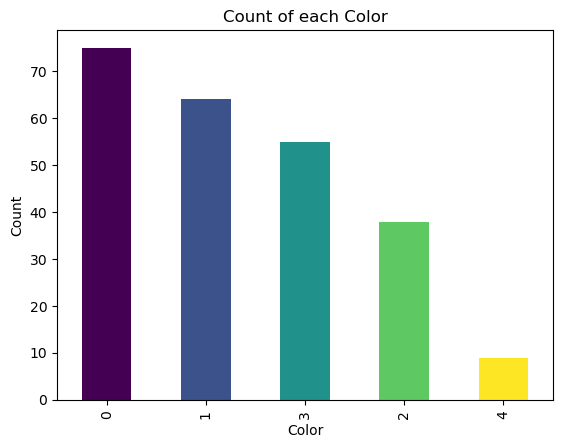

In [22]:
Color_counts = orange['Color'].value_counts()
num_varieties = len(Color_counts)
colors = plt.cm.viridis(np.linspace(0, 1, num_varieties))
Color_counts.plot(kind='bar', color=colors)

plt.xlabel('Color')
plt.ylabel('Count')
plt.title('Count of each Color')

plt.show()

In [23]:
#Hitung Distribusi Variety
Variety = orange['Variety'].value_counts().reset_index()
Variety

,index,Variety
0,3,21
1,21,18
2,18,18
3,13,16
4,11,16
5,20,14
6,4,14
7,23,14
8,17,13
9,16,13


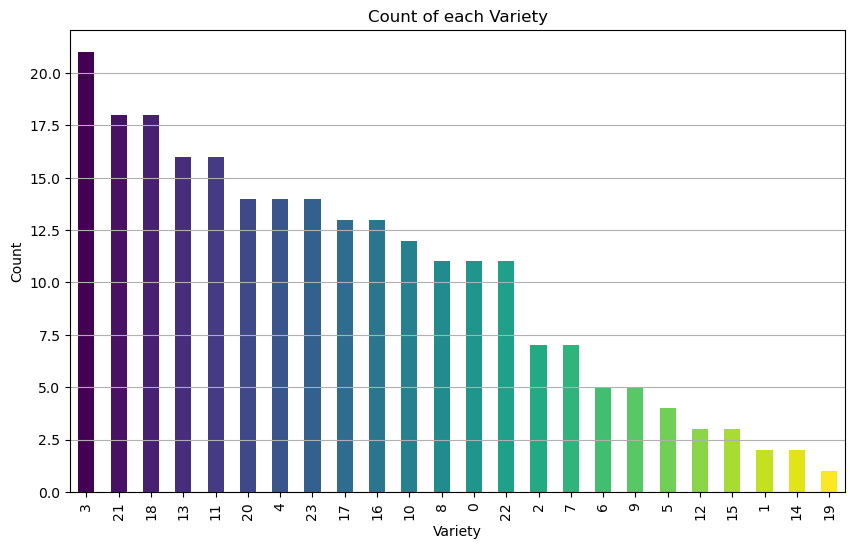

In [24]:
variety_counts = orange['Variety'].value_counts()
num_varieties = len(variety_counts)
colors = plt.cm.viridis(np.linspace(0, 1, num_varieties))
plt.figure(figsize=(10,6))
variety_counts.plot(kind='bar', color=colors)

plt.xlabel('Variety')
plt.ylabel('Count')
plt.title('Count of each Variety')
plt.grid(axis='y')
plt.show()

In [25]:
#Hitung distribusi Blemishes
Blemishes = orange['Blemishes (Y/N)'].value_counts().reset_index()
Blemishes

,index,Blemishes (Y/N)
0,0,149
1,10,23
2,8,17
3,6,14
4,7,10
5,4,9
6,9,8
7,5,6
8,11,2
9,3,1


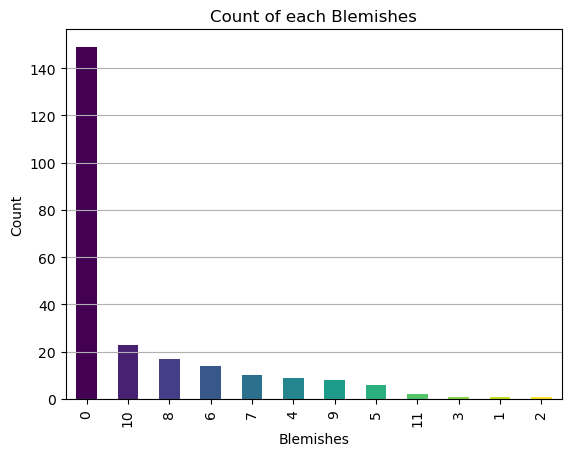

In [26]:
Color_counts = orange['Blemishes (Y/N)'].value_counts()
num_varieties = len(Color_counts)
colors = plt.cm.viridis(np.linspace(0, 1, num_varieties))
Color_counts.plot(kind='bar', color=colors)

plt.xlabel('Blemishes')
plt.ylabel('Count')
plt.title('Count of each Blemishes')
plt.grid(axis='y')
plt.show()

In [27]:
Ripeness = orange['Ripeness (1-5)'].value_counts().reset_index()
Ripeness.columns = ['Ripeness (1-5)', 'Count']  # Ganti nama kolom
Ripeness

,Ripeness (1-5),Count
0,5.0,58
1,4.0,52
2,3.0,46
3,2.0,27
4,4.5,23
5,1.0,17
6,3.5,12
7,2.5,6


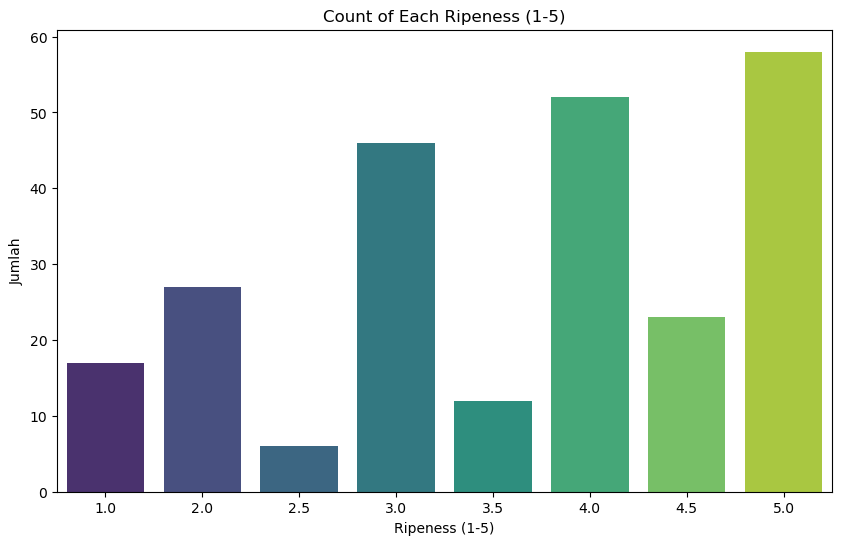

In [28]:
# Visualisasi distribusi Ripeness
plt.figure(figsize=(10, 6))
sns.barplot(x='Ripeness (1-5)', y='Count', data=Ripeness, palette='viridis')
plt.title('Count of Each Ripeness (1-5)')
plt.xlabel('Ripeness (1-5)')
plt.ylabel('Jumlah')
plt.show()

In [29]:
#Hitung Distribusi Quality
Quality_counts = orange['Quality (1-5)'].value_counts().reset_index()
Quality_counts

,index,Quality (1-5)
0,4.0,76
1,5.0,52
2,4.5,29
3,3.0,26
4,3.5,23
5,2.0,14
6,2.5,12
7,1.0,9


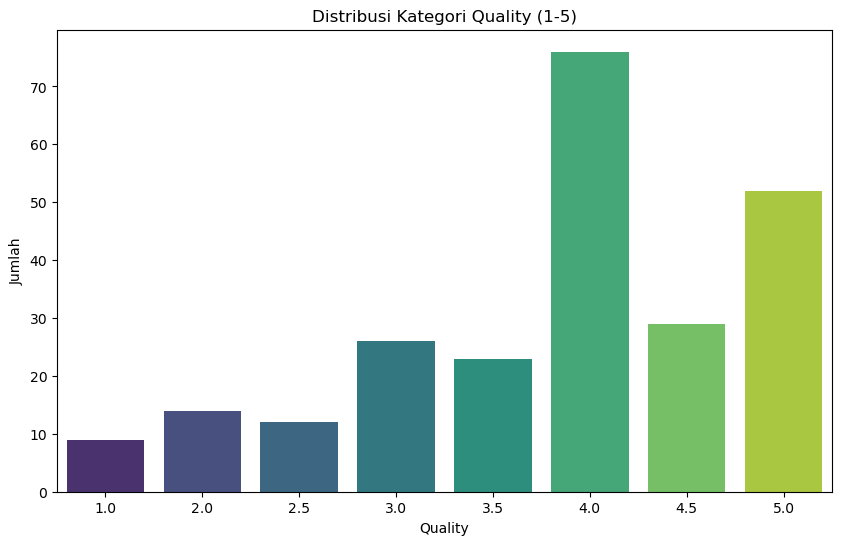

In [30]:
# Crosstab untuk menghitung distribusi Quality
quality_counts = orange['Quality (1-5)'].value_counts().sort_index()

# Membuat bar plot menggunakan Matplotlib
plt.figure(figsize=(10, 6))
sns.barplot(x=quality_counts.index, y=quality_counts.values, palette='viridis')
plt.title("Distribusi Kategori Quality (1-5)")
plt.xlabel("Quality")
plt.ylabel("Jumlah")
plt.show()

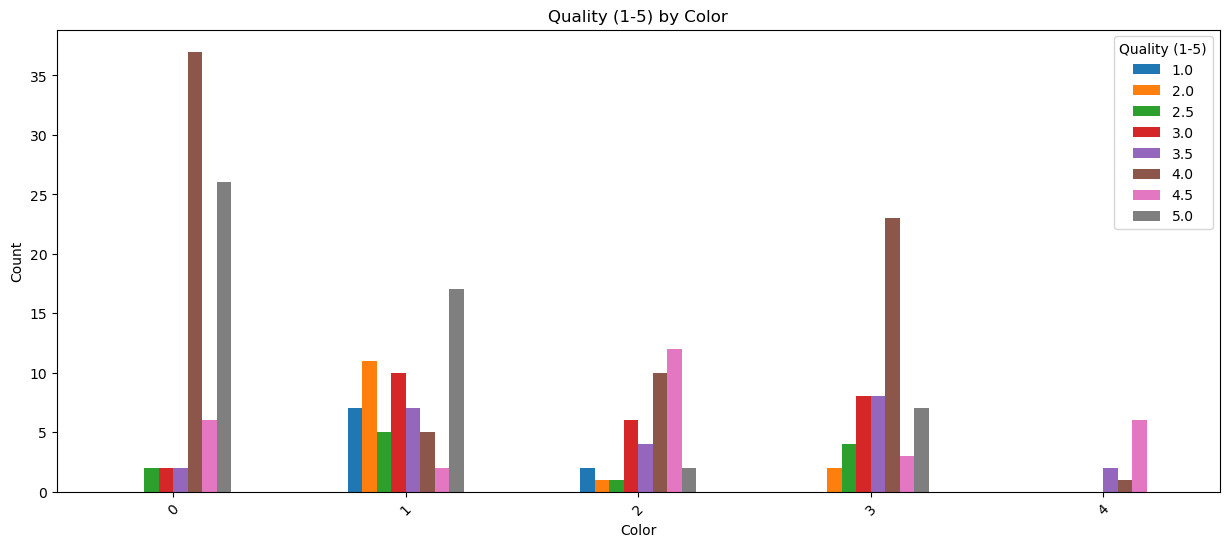

In [31]:
quality_size = pd.crosstab(orange['Color'], orange['Quality (1-5)'])
ax = quality_size.plot(kind='bar', figsize=(15, 6))
ax.set_xticklabels(quality_size.index, rotation=45)

plt.xlabel('Color')
plt.ylabel('Count')
plt.title('Quality (1-5) by Color')
plt.show()

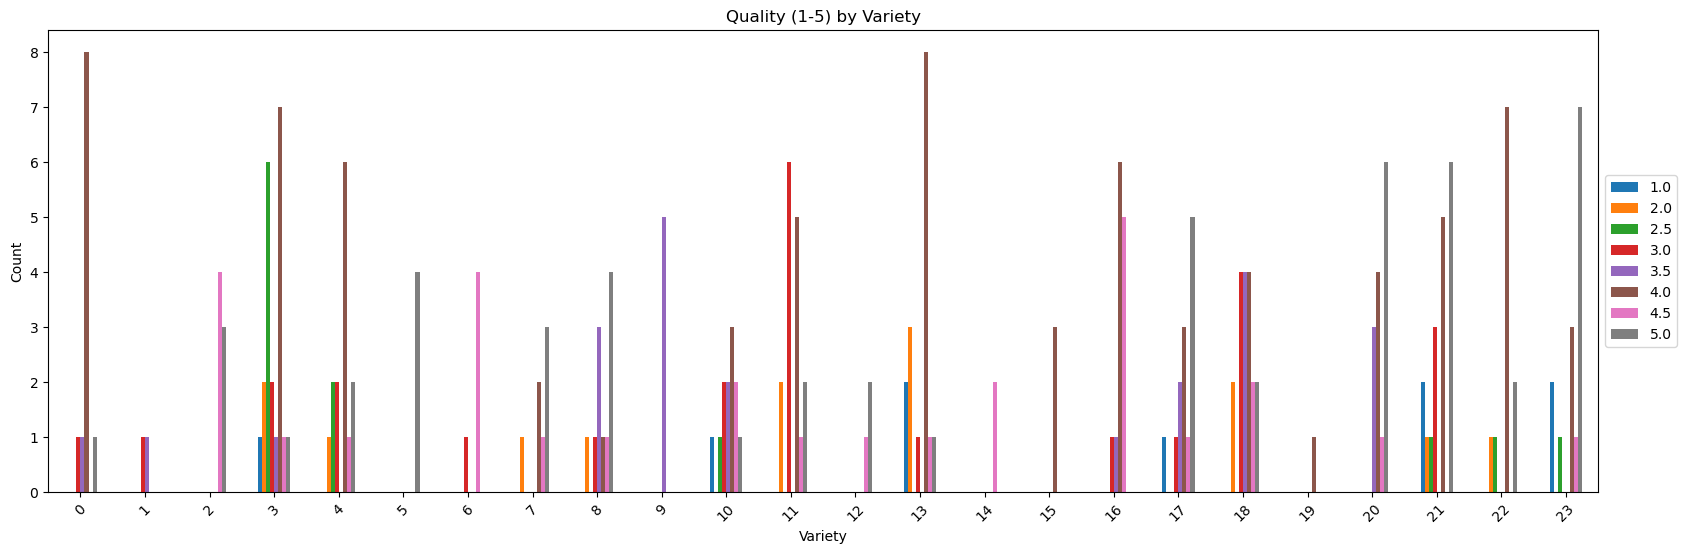

In [32]:
quality_size = pd.crosstab(orange['Variety'], orange['Quality (1-5)'])
ax = quality_size.plot(kind='bar', figsize=(20, 6))
ax.set_xticklabels(quality_size.index, rotation=45)

plt.xlabel('Variety')
plt.ylabel('Count')
plt.title('Quality (1-5) by Variety')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

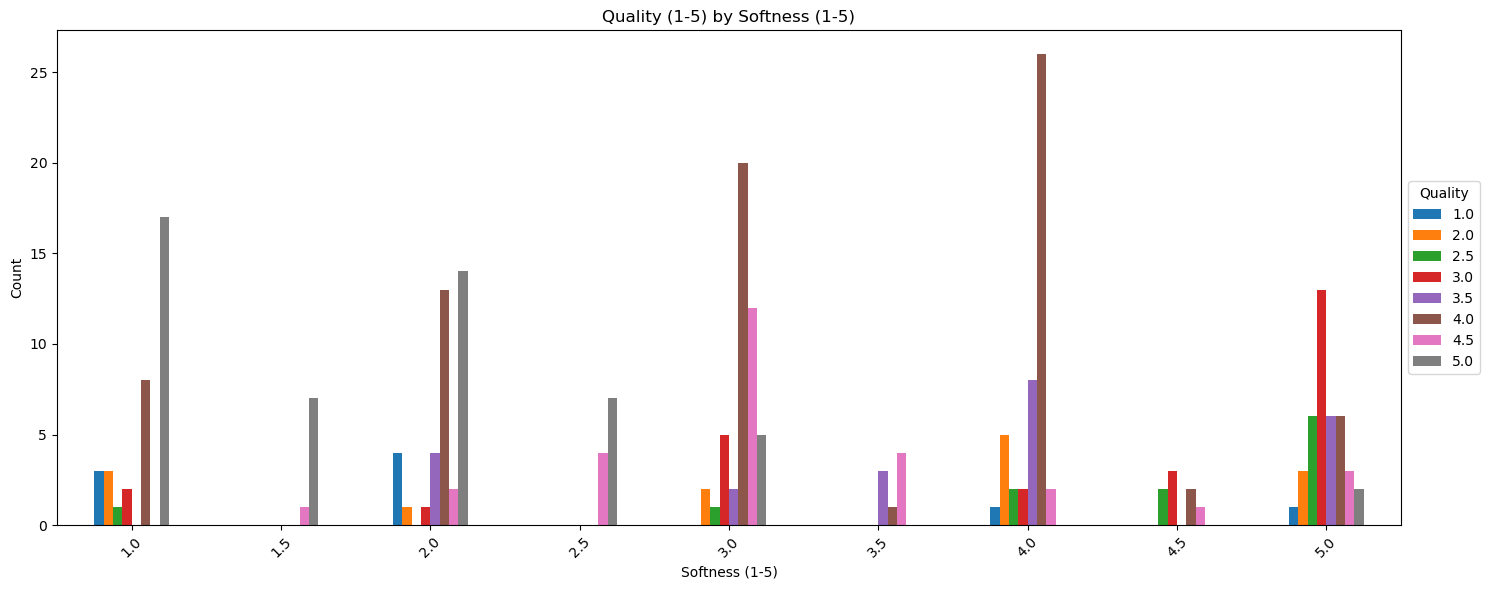

In [33]:
# Menghitung distribusi Quality berdasarkan Softness
quality_size = pd.crosstab(orange['Softness (1-5)'], orange['Quality (1-5)'])
# Membuat plot bar
ax = quality_size.plot(kind='bar', figsize=(15, 6))

# Menyesuaikan tampilan
ax.set_xticklabels(quality_size.index, rotation=45)
plt.xlabel('Softness (1-5)')
plt.ylabel('Count')
plt.title('Quality (1-5) by Softness (1-5)')
plt.legend(title='Quality', loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

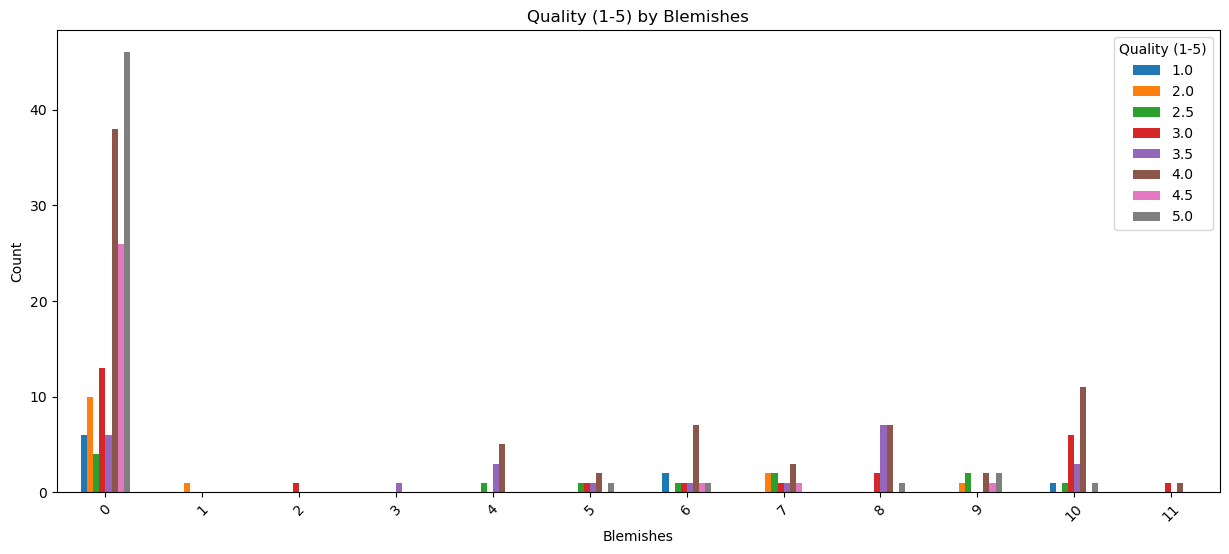

In [34]:
quality_size = pd.crosstab(orange['Blemishes (Y/N)'], orange['Quality (1-5)'])
ax = quality_size.plot(kind='bar', figsize=(15, 6))
ax.set_xticklabels(quality_size.index, rotation=45)

plt.xlabel('Blemishes')
plt.ylabel('Count')
plt.title('Quality (1-5) by Blemishes')

plt.show()

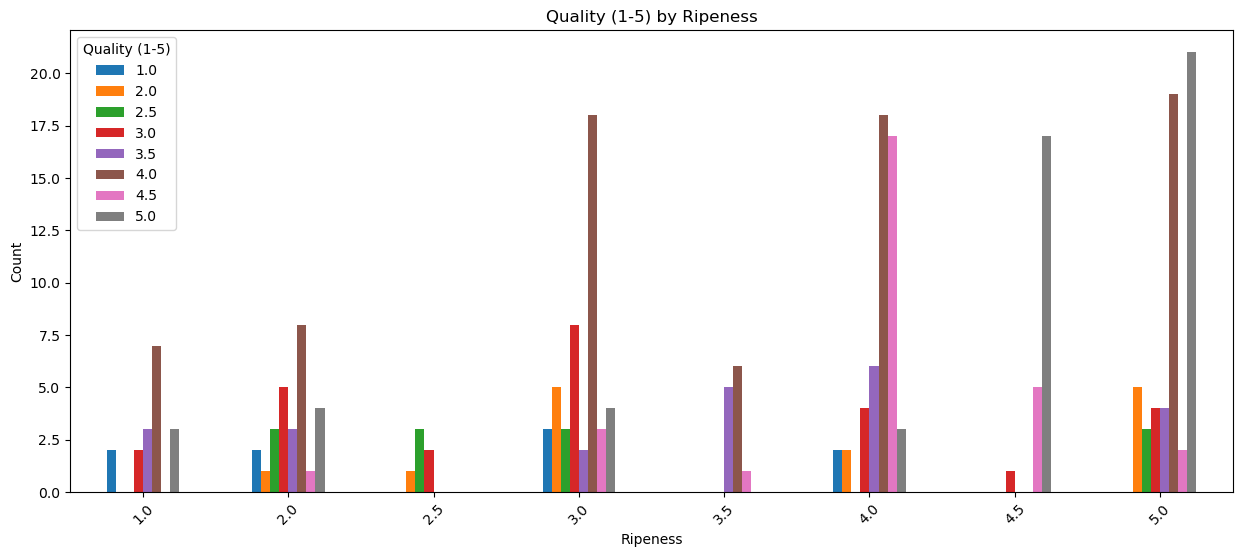

In [35]:
quality_size = pd.crosstab(orange['Ripeness (1-5)'], orange['Quality (1-5)'])
ax = quality_size.plot(kind='bar', figsize=(15, 6))
ax.set_xticklabels(quality_size.index, rotation=45)

plt.xlabel('Ripeness')
plt.ylabel('Count')
plt.title('Quality (1-5) by Ripeness')
plt.show()

In [36]:
# Menghitung jumlah HarvestTime berdasarkan Ripeness
HarvestTime = orange.groupby('Ripeness (1-5)')['HarvestTime (days)'].value_counts().reset_index(name='Count')

# Menampilkan hasil
print(HarvestTime)

     Ripeness (1-5)  HarvestTime (days)  Count
0               1.0                  19      4
1               1.0                  11      3
2               1.0                  15      2
3               1.0                  12      1
4               1.0                  13      1
..              ...                 ...    ...
96              5.0                  17      2
97              5.0                  19      2
98              5.0                  14      1
99              5.0                  16      1
100             5.0                  24      1

[101 rows x 3 columns]


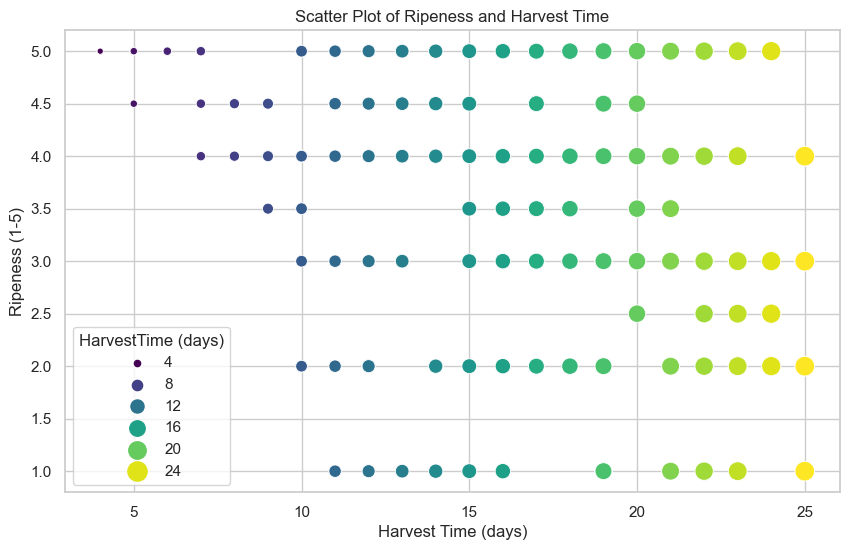

In [37]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=orange, x='HarvestTime (days)', y='Ripeness (1-5)',
                size='HarvestTime (days)', sizes=(20, 200),
                hue='HarvestTime (days)', palette='viridis')
plt.title('Scatter Plot of Ripeness and Harvest Time')
plt.xlabel('Harvest Time (days)')
plt.ylabel('Ripeness (1-5)')
plt.show()

### Preparing data

In [38]:
label_encoder = LabelEncoder()
orange['Color'] = label_encoder.fit_transform(orange['Color'])
orange['Variety'] = label_encoder.fit_transform(orange['Variety'])
orange['Blemishes (Y/N)'] = label_encoder.fit_transform(orange['Blemishes (Y/N)'])

In [39]:
X=orange.drop('Quality (1-5)',axis=1)
y=orange['Quality (1-5)']

In [40]:
print("Unique values in y:", np.unique(y))

Unique values in y: ['1.0' '2.0' '2.5' '3.0' '3.5' '4.0' '4.5' '5.0']


In [41]:
# Convert y to numeric, setting invalid entries to NaN
y = pd.to_numeric(y, errors='coerce')

# Check for NaN values
if y.isnull().any():
    print("Found non-numeric values in y. Replacing them with a default value or dropping them.")
    y = y.fillna(0)
    
thresholds = [1.5,2.5, 3.5, 4.5]

y_discrete = np.digitize(y, bins=thresholds)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y_discrete, test_size=0.2, random_state=42)

In [43]:
X

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N)
0,7.5,180,12.0,3.2,2.0,10,4.0,2,22,0
1,8.2,220,10.5,3.4,3.0,14,4.5,0,13,0
2,6.8,150,14.0,3.0,1.0,7,5.0,1,3,0
3,9.0,250,8.5,3.8,4.0,21,3.5,3,1,0
4,8.5,210,11.5,3.3,2.5,12,5.0,2,6,6
...,...,...,...,...,...,...,...,...,...,...
236,8.0,194,10.9,3.6,5.0,13,1.0,3,20,8
237,7.4,275,8.5,3.5,5.0,20,5.0,1,10,0
238,7.5,196,15.7,3.0,3.0,13,3.0,0,21,5
239,7.2,251,9.8,4.3,3.0,23,1.0,1,11,5


In [44]:
y

0      4.0
1      4.5
2      5.0
3      3.5
4      4.5
      ... 
236    5.0
237    4.0
238    5.0
239    3.0
240    4.0
Name: Quality (1-5), Length: 241, dtype: float64

In [45]:
label_encoder = LabelEncoder()
y_discrete = label_encoder.fit_transform(y)

X_train, x_test, Y_train, y_test = train_test_split(X, y_discrete, test_size=0.2, random_state=42)

In [46]:
X_train

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N)
115,6.1,279,14.1,3.90,4.0,13,4.0,3,13,4
205,7.5,138,7.0,4.10,1.0,20,3.0,2,13,0
216,7.2,261,8.0,3.30,5.0,21,5.0,2,22,0
132,7.9,155,12.4,3.58,1.0,15,5.0,2,13,0
84,8.9,240,9.0,3.80,4.0,19,3.0,3,9,8
...,...,...,...,...,...,...,...,...,...,...
106,7.4,123,6.7,2.82,1.0,18,5.0,1,4,0
14,9.2,260,9.5,3.70,4.5,20,4.0,3,18,0
92,8.7,230,8.0,3.90,4.0,17,3.5,0,11,0
179,6.9,291,9.9,3.80,5.0,10,4.0,1,17,7


In [47]:
x_test

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N)
24,7.9,190,10.5,3.10,2.5,12,4.0,2,7,0
6,7.2,160,9.0,3.50,3.5,9,4.0,4,19,0
222,9.4,291,6.3,3.90,4.0,17,2.0,1,4,0
208,7.9,197,13.1,3.20,2.0,14,2.0,0,21,6
236,8.0,194,10.9,3.60,5.0,13,1.0,3,20,8
173,6.8,263,13.4,3.10,4.0,12,5.0,0,13,0
197,8.3,261,13.2,3.80,3.0,22,5.0,0,21,0
220,9.7,280,8.5,4.30,3.0,19,1.0,1,10,10
9,7.8,190,12.0,3.10,2.0,11,4.5,2,8,0
113,6.1,137,12.4,3.54,4.0,20,5.0,2,16,0


In [48]:
Y_train

array([5, 1, 2, 7, 4, 5, 6, 4, 7, 4, 5, 5, 4, 5, 6, 2, 0, 7, 6, 5, 5, 5,
       3, 4, 3, 1, 3, 7, 0, 6, 5, 4, 5, 7, 5, 5, 7, 6, 6, 4, 0, 6, 7, 1,
       5, 7, 7, 5, 6, 4, 7, 4, 5, 7, 5, 7, 0, 7, 2, 5, 5, 7, 3, 6, 3, 3,
       7, 5, 2, 7, 5, 5, 6, 7, 5, 3, 6, 1, 5, 3, 5, 5, 5, 5, 6, 7, 7, 5,
       4, 6, 5, 3, 5, 6, 4, 7, 5, 7, 5, 6, 5, 1, 3, 3, 7, 5, 5, 6, 7, 7,
       7, 5, 2, 4, 1, 1, 5, 3, 2, 1, 7, 5, 3, 7, 6, 5, 1, 7, 7, 0, 4, 6,
       3, 7, 7, 5, 5, 5, 5, 6, 5, 3, 5, 7, 7, 6, 7, 4, 0, 2, 5, 7, 5, 0,
       5, 6, 3, 5, 7, 7, 2, 5, 5, 5, 4, 5, 2, 0, 4, 6, 6, 0, 1, 5, 5, 5,
       3, 7, 2, 3, 4, 5, 3, 5, 3, 5, 7, 3, 5, 5, 3, 1], dtype=int64)

In [49]:
y_test

array([6, 5, 2, 5, 7, 5, 5, 3, 7, 5, 7, 7, 5, 6, 5, 4, 5, 7, 5, 7, 5, 6,
       1, 6, 5, 4, 2, 6, 7, 5, 1, 5, 5, 7, 1, 3, 7, 4, 5, 7, 7, 3, 7, 4,
       7, 4, 3, 6, 4], dtype=int64)

In [50]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(x_test)

### Clasification (Random Forest Model)

In [51]:
randforest = RandomForestClassifier(n_estimators=50)

In [52]:
randforest.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=50)

In [53]:
randforest.score(X_train, Y_train)

1.0

In [54]:
randforest.score(x_test, y_test)

0.5102040816326531

In [55]:
y_pred = randforest.predict(x_test)
y_pred

array([6, 6, 1, 5, 4, 5, 5, 5, 7, 5, 7, 7, 5, 5, 5, 5, 5, 7, 5, 5, 4, 5,
       0, 6, 5, 4, 2, 7, 7, 5, 0, 0, 5, 7, 5, 1, 7, 5, 5, 5, 7, 5, 5, 4,
       5, 6, 0, 5, 0], dtype=int64)

In [56]:
random_forest = RandomForestClassifier(n_estimators=10, random_state=42)
random_forest.fit(X_train_scaled, y_train)
rf_preds = random_forest.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, rf_preds)
mse=mse = mean_squared_error(y_test, rf_preds)** 0.5
print("Random Forest Accuracy:", rf_accuracy)
print("MSE:", mse)

Random Forest Accuracy: 0.10204081632653061
MSE: 2.29906813420444


In [57]:
# Menampilkan laporan klasifikasi
print("Laporan Klasifikasi:")
print(classification_report(y_test, y_pred))

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         3
           2       1.00      0.50      0.67         2
           3       0.00      0.00      0.00         4
           4       0.50      0.33      0.40         6
           5       0.50      0.80      0.62        15
           6       0.50      0.33      0.40         6
           7       0.89      0.62      0.73        13

    accuracy                           0.51        49
   macro avg       0.42      0.32      0.35        49
weighted avg       0.55      0.51      0.51        49



In [58]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=5) 
knn_classifier.fit(X_train, y_train)
knn_preds = knn_classifier.predict(X_test)
mse=mse = mean_squared_error(y_test, knn_preds)** 0.5
knn_accuracy = accuracy_score(y_test, knn_preds)
print("KNN Accuracy:", knn_accuracy)
print("MSE", mse)

KNN Accuracy: 0.16326530612244897
MSE 2.1712405933672376


In [59]:
# Menampilkan confusion matrix
cm = confusion_matrix(y_test, y_pred)

In [60]:
# Menampilkan fitur penting (feature importance)
feature_importances = randforest.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Menampilkan pentingnya fitur
print("Pentingnya Fitur:")
print(importance_df)

Pentingnya Fitur:
              Feature  Importance
2    Brix (Sweetness)    0.185755
3        pH (Acidity)    0.119345
4      Softness (1-5)    0.112625
1          Weight (g)    0.099594
5  HarvestTime (days)    0.099195
6      Ripeness (1-5)    0.090984
0           Size (cm)    0.086753
8             Variety    0.072344
9     Blemishes (Y/N)    0.070217
7               Color    0.063188


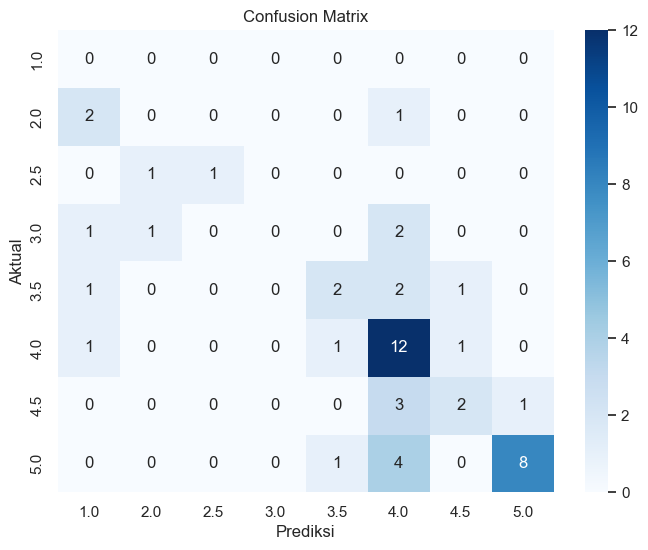

In [61]:
# Menampilkan confusion matrix dengan label yang sesuai
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

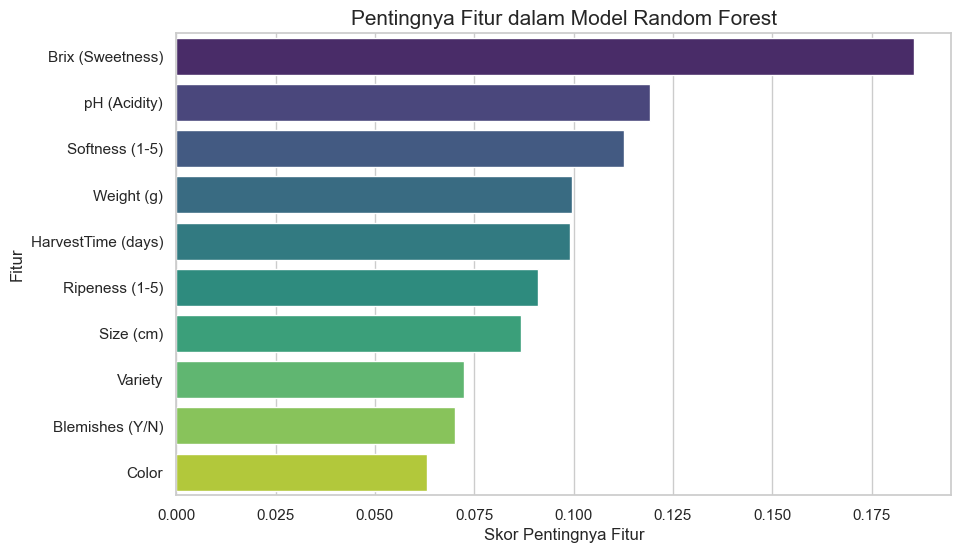

In [62]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')

# Memberi judul dan label
plt.title('Pentingnya Fitur dalam Model Random Forest', fontsize=15)
plt.xlabel('Skor Pentingnya Fitur', fontsize=12)
plt.ylabel('Fitur', fontsize=12)

# Menampilkan grafik
plt.show()

### HYPERPARAMETER TUNING

In [63]:
# Membuat model Random Forest dan KNN
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
knn = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5))  # KNN dengan standardisasi

In [64]:
# Melakukan cross-validation pada Random Forest
rf_cv_scores = cross_val_score(random_forest, X_train, y_train, cv=5, scoring='accuracy')  # 5-fold CV

In [65]:
# Melakukan cross-validation pada KNN
knn_cv_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')  # 5-fold CV

In [66]:
# Menampilkan hasil cross-validation
print(f"Random Forest Cross-Validation Accuracy: {rf_cv_scores}")
print(f"Mean Accuracy for Random Forest: {rf_cv_scores.mean()}")

print(f"KNN Cross-Validation Accuracy: {knn_cv_scores}")
print(f"Mean Accuracy for KNN: {knn_cv_scores.mean()}")

Random Forest Cross-Validation Accuracy: [0.64102564 0.71794872 0.68421053 0.68421053 0.60526316]
Mean Accuracy for Random Forest: 0.6665317139001349
KNN Cross-Validation Accuracy: [0.56410256 0.69230769 0.5        0.5        0.52631579]
Mean Accuracy for KNN: 0.5565452091767881


In [67]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Inisialisasi LabelEncoder untuk target (y_train)
label_encoder = LabelEncoder()

# Latih LabelEncoder pada y_train
label_encoder.fit(y_train)

# Gabungkan kelas yang ada di label encoder dengan kelas baru dari y_train
all_unique_labels = np.unique(np.concatenate((label_encoder.classes_, np.unique(y_train))))

# Update kelas di label_encoder
label_encoder.classes_ = all_unique_labels

# Transformasi y_train
y_train = label_encoder.transform(y_train)


In [68]:
# Definisikan kolom kategorikal
kategori_kolom = ['color', 'variety', 'blemishes']  # Ganti dengan nama kolom kategorikal Anda

# Inisialisasi dictionary untuk menyimpan encoder untuk setiap kolom
label_encoders = {}

# Terapkan Label Encoding pada setiap kolom kategorikal
for kolom in kategori_kolom:
    if kolom in X_train.columns:  # Pastikan kolom ada dalam X_train
        le = LabelEncoder()
        X_train[kolom] = le.fit_transform(X_train[kolom])  # Fit dan transform kolom
        label_encoders[kolom] = le  # Simpan encoder untuk kolom ini

# Jika ada kolom kategorikal lain di X_test, terapkan encoder yang sudah dipelajari
for kolom in kategori_kolom:
    if kolom in X_test.columns:
        le = label_encoders.get(kolom)  # Ambil encoder yang sudah dipelajari
        X_test[kolom] = le.transform(X_test[kolom])

In [69]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

y_train = orange.loc[X_train.index, 'Quality (1-5)']
# Ensure 'Quality (1-5)' is of numeric type before label encoding
y_train = y_train.astype(float).astype(int) # or y_latih = y_latih.astype(float) if it contains floats
y_train = y_train.astype(str).astype(float).astype(int)


all_unique_labels = np.unique(np.concatenate((label_encoder.classes_, y_train.unique())))
label_encoder.classes_ = all_unique_labels
y_train = label_encoder.transform(y_train)

# --- Apply Label Encoding to X_latih ---
for kolom in kategori_kolom:
    if kolom in X_train.columns:
        le = label_encoders.get(kolom)  # Get the fitted encoder if available
        if le is None:
            le = LabelEncoder()  # Create a new encoder if not found
            X_train[kolom] = le.fit_transform(X_train[kolom])
            label_encoders[kolom] = le # Store for future use
        else:
            # Handle unseen values in X_latih
            # Get unique values in both original and new data
            all_unique_values = list(le.classes_) + list(X_train[kolom].unique())
            all_unique_values = list(set(all_unique_values))  # Remove duplicates

            # Refit the LabelEncoder with all unique values
            le.classes_ = np.array(all_unique_values)

            # Now transform X_latih
            X_train[kolom] = le.transform(X_train[kolom])

grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [71]:
# Menampilkan hasil terbaik Random Forest
print("Best Score (Random Forest):", grid_search.best_score_)

Best Score (Random Forest): 0.671875


In [73]:
# Menampilkan hasil terbaik KNN
print("Best Score (KNN):", grid_search.best_score_)

Best Score (KNN): 0.671875


### Evaluasi dan Best Model

In [74]:
# Evaluasi model Random Forest
rf_best_model = grid_search.best_estimator_
rf_y_pred = rf_best_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)

print("=== Random Forest ===")
print("Accuracy:", rf_accuracy)
print("Classification Report:\n", classification_report(y_test, rf_y_pred))

=== Random Forest ===
Accuracy: 0.14285714285714285
Classification Report:
               precision    recall  f1-score   support

           1       0.33      0.33      0.33         3
           2       0.50      0.50      0.50         2
           3       0.29      0.50      0.36         4
           4       0.10      0.50      0.17         6
           5       0.00      0.00      0.00        15
           6       0.00      0.00      0.00         6
           7       0.00      0.00      0.00        13

    accuracy                           0.14        49
   macro avg       0.17      0.26      0.20        49
weighted avg       0.08      0.14      0.09        49



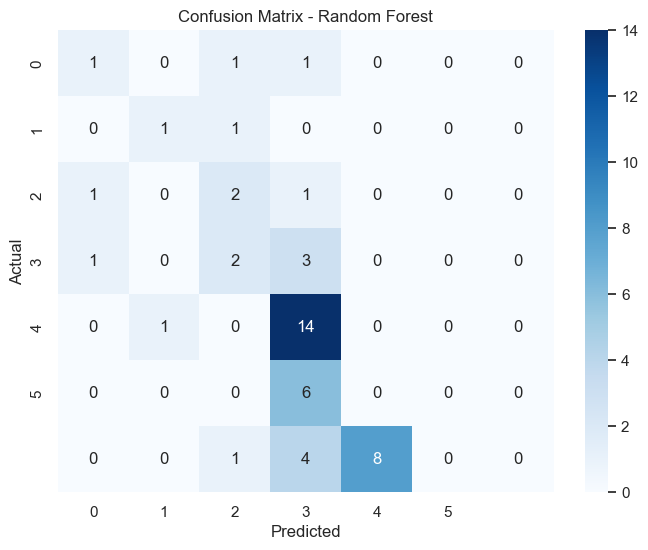

In [75]:
# Confusion Matrix untuk Random Forest
rf_cm = confusion_matrix(y_test, rf_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

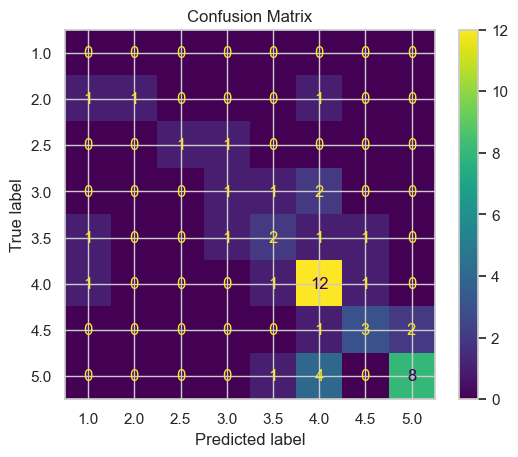

In [76]:
#Grafik confusion matrix menunjukkan performa model dalam memprediksi kelas.
from sklearn.metrics import ConfusionMatrixDisplay

# Split data menjadi train dan test
X = orange.drop('Quality (1-5)', axis=1)  # Fitur
y = orange['Quality (1-5)']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Prediksi pada data test
y_pred = rf_model.predict(X_test)

# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, cmap='viridis')
plt.title('Confusion Matrix')
plt.show()

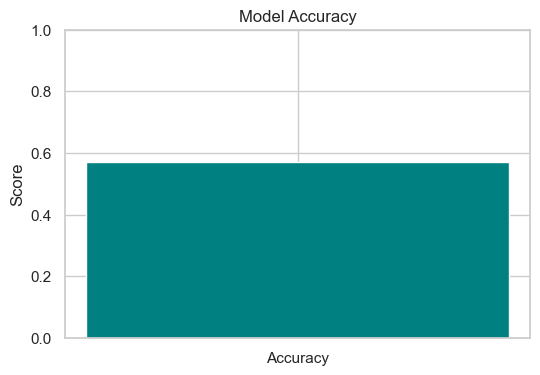

In [77]:
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)

# Plot akurasi
plt.figure(figsize=(6, 4))
plt.bar(['Accuracy'], [accuracy], color='teal')
plt.title('Model Accuracy')
plt.ylim(0, 1)
plt.ylabel('Score')
plt.show()

In [78]:
from sklearn.metrics import classification_report, accuracy_score

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

# Membuat DataFrame untuk evaluasi
evaluation_df = pd.DataFrame(report).transpose()
evaluation_df['accuracy'] = accuracy  # Menambahkan akurasi ke tabel
evaluation_df = evaluation_df.reset_index().rename(columns={'index': 'Metric'})

# Menampilkan tabel evaluasi
print(evaluation_df)

          Metric  precision    recall  f1-score    support  accuracy
0            1.0   0.000000  0.000000  0.000000   0.000000  0.571429
1            2.0   1.000000  0.333333  0.500000   3.000000  0.571429
2            2.5   1.000000  0.500000  0.666667   2.000000  0.571429
3            3.0   0.333333  0.250000  0.285714   4.000000  0.571429
4            3.5   0.400000  0.333333  0.363636   6.000000  0.571429
5            4.0   0.571429  0.800000  0.666667  15.000000  0.571429
6            4.5   0.600000  0.500000  0.545455   6.000000  0.571429
7            5.0   0.800000  0.615385  0.695652  13.000000  0.571429
8       accuracy   0.571429  0.571429  0.571429   0.571429  0.571429
9      macro avg   0.588095  0.416506  0.465474  49.000000  0.571429
10  weighted avg   0.638873  0.571429  0.581106  49.000000  0.571429
